# <center> Assignment 5 – Handling Data During AI Training (10/18/22)
# <center> Submitted By: Haridas Das

# Solution 
In this homework, we want to see how the image rate changes due to the data pipeline organization using the code train_resnet34.py. To do this, we will change the parallel_threads that control parallelism in Tensorflowand and prefetch_buffer_size, which governs how many batches to prefetch. Finally, we make a table of how the mean image rate changes.

# Analysis 1: Effect on Number of Steps  when prefetch_buffer_size is constant that is 8

# Case A: num_steps = 100, and prefetch_buffer_size = 8

# Case A: num_steps = 100, and prefetch_buffer_size = 8
Case 1: When parallel_threads = 128, and prefetch_buffer_size = 8, then mean image/s = 772.32 and standard deviation 136.31

Case 2: When parallel_threads = 64, and prefetch_buffer_size = 8, then mean image/s = 827.82 and standard deviation 86.15

Case 3: When parallel_threads = 32, and prefetch_buffer_size = 8, then mean image/s = 793.88 and standard deviation 152.78

Case 4: When parallel_threads = 16, and prefetch_buffer_size = 8, then mean image/s = 796.44 and standard deviation 136.63

Case 5: When parallel_threads = 8, and prefetch_buffer_size = 8, then mean image/s = 808.78 and standard deviation 112.46

Case 6: When parallel_threads = 4, and prefetch_buffer_size = 8, then mean image/s = 816.81 and standard deviation 138.36

Case 7: When parallel_threads = 0, and prefetch_buffer_size = 8, then mean image/s = 818.31 and standard deviation 101.68    

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# mean per second 
mean_p_s100= [818.31,816.81, 808,796.44, 793.88, 827.82, 772.32]
# parallel threds 
parallel_threads=[0,4,8,16,32,64,128]


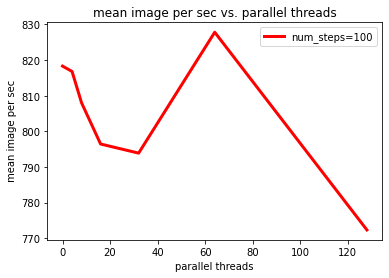

In [23]:
plt.plot(parallel_threads, mean_p_s100, 'r',label = "num_steps=100", linewidth=3)
# naming the x axis
plt.xlabel('parallel threads')
# naming the y axis
plt.ylabel(' mean image per sec')
# giving a title to my graph
plt.title('mean image per sec vs. parallel threads')
  
# show a legend on the plot
plt.legend()

 When parallel_threads incresaes mean/s value is going down. 

# Case B: num_steps = 1000, and prefetch_buffer_size = 8

# Case A: num_steps = 1000, and prefetch_buffer_size = 8
Case 1: When parallel_threads = 128, and prefetch_buffer_size = 8, then mean image/s = 792.36 and standard deviation 124.80

Case 2: When parallel_threads = 64, and prefetch_buffer_size = 8, then mean image/s = 799.47 and standard deviation 100.16

Case 3: When parallel_threads = 32, and prefetch_buffer_size = 8, then mean image/s = 793.81 and standard deviation 101.42

Case 4: When parallel_threads = 16, and prefetch_buffer_size = 8, then mean image/s = 793.65 and standard deviation 134.45

Case 5: When parallel_threads = 8, and prefetch_buffer_size = 8, then mean image/s = 818.19 and standard deviation 107.67

Case 6: When parallel_threads = 4, and prefetch_buffer_size = 8, then mean image/s = 811.00 and standard deviation 138.36

Case 7: When parallel_threads = 0, and prefetch_buffer_size = 8, then mean image/s = 786.06 and standard deviation 145.50    

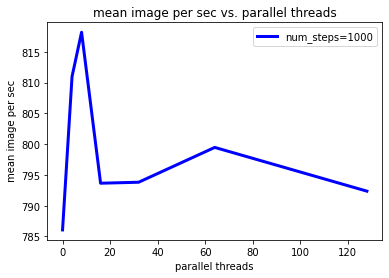

In [25]:
# mean per second 
mean_p_s1000= [786.06, 811.00, 818.19, 793.65, 793.81, 799.47, 792.36]

# parallel threds 
parallel_threads1000=[0,4,8,16,32,64,128]


plt.plot(parallel_threads1000, mean_p_s1000, 'b',label = "num_steps=1000", linewidth=3)
# naming the x axis
plt.xlabel('parallel threads')
# naming the y axis
plt.ylabel(' mean image per sec')
# giving a title to my graph
plt.title('mean image per sec vs. parallel threads')
  
# show a legend on the plot
plt.legend()

 When parallel_threads incresaes mean/s value is going down. 

# Comare Together

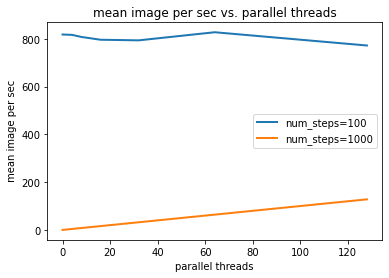

In [12]:
plt.plot(parallel_threads, mean_p_s100, 'r',label = "num_steps=100", linewidth=3)
plt.plot(parallel_threads, parallel_threads1000,'b', label = "num_steps=1000",linewidth=3)
# naming the x axis
plt.xlabel('parallel threads')
# naming the y axis
plt.ylabel(' mean image per sec')
# giving a title to my graph
plt.title('mean image per sec vs. parallel threads')
  
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.show()

# Analysis 1 Combined Conclusion:

1. When parallel_threads incresaes mean/s value is going down. 

2. If the num_steps are same then parallel threads have not too much impact as the mean/s does not chage a lot. But, mean image per s chages when num_steps increased. Probaly we can find a good Num_steps when the mean image per sec is gonna be constant. 

# Analysis 2 : effect of parallel_threads when it increse, but thenum_steps = 1000 (constant), and prefetch_buffer_size varies  varies =parallel threds chages. 

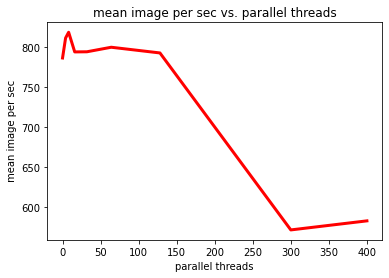

In [19]:
mean_p_s1000_new= [786.06, 811.00, 818.19, 793.65, 793.81, 799.47, 792.36, 571.548, 582.845]
# parallel threds 
parallel_threads1000_new=[0,4,8,16,32,64,128, 300, 400]

plt.plot(parallel_threads1000_new, mean_p_s1000_new, 'r',label = "num_steps=100", linewidth=3)
# naming the x axis
plt.xlabel('parallel threads')
# naming the y axis
plt.ylabel(' mean image per sec')
# giving a title to my graph
plt.title('mean image per sec vs. parallel threads')
  
 
# function to show the plot
plt.show()

In [ ]:
When parallel_threads incresaes mean/s value is going down. 

# Analysis 2 Conclusion:

It is going down when parallel threds increasing. 

# Analysis 3: 

The code train_resnet34.Pi gives different results on the same hyperparameters at other times. We can use a seed to fix it.

# choice 1: 

When we run the code , for example, for num_steps = 1000, and prefetch_buffer_size = 8 we got differn mean/s on it depending on the parallel_threads = 128 gives 
three different values. 
    
a. 128 gives 317.574

b. 128 gives 224.216

c. 128 gives 638.276

# choice 2: 
a.  Another example mean/s 582.845 when num_steps = 1000 , and prefetch_buffer_size=400
b. Another example mean/s 596.419 when num_steps = 1000 , and prefetch_buffer_size=400

# Conclusion on Analysis 3
Reproducible deep-learning training is a challenge, so to recover this issue, we can use tf.random.set_seed. However, that's optional for the homework, so I haven't rerun the code using the seed.